In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [2]:
train_features = train_df.iloc[:,train_df.columns != 'label']
train_labels = train_df.iloc[:,train_df.columns == 'label']
train_labels = train_labels.values.reshape(-1)

test_features = test_df.iloc[:,test_df.columns != 'label']
test_labels = test_df.iloc[:,test_df.columns == 'label']
test_labels = test_labels.values.reshape(-1)

In [3]:
def pretty_print(image_example):
    """ Pretty prints a Sign Language MNIST example. Code taken from Fashion MNIST Homework.

    Parameters:
        image_example: a 1x784 numpy array corresponding to the features of
                       a single image.

    Returns:
        None.
    """
    print(np.array_str(image_example, precision=1, max_line_width=116))

Dimensions of training set feature matrix: (27455, 784)
Dimensions of training set label matrix: (27455,)
[ 81  85  89  93  96 101 110 116 122 127 131 133 135 140 143 146 149 151 153 155 157 158 160 160 163 164 163 163
  81  87  90  94  96 101 110 115 122 129 132 133 136 141 144 147 149 151 153 156 157 160 161 162 164 164 164 164
  81  86  90  95  98 104 112 118 124 131 134 135 137 141 145 149 151 152 153 155 158 161 162 162 163 165 166 166
  84  86  91  95  98 106 112 120 126 132 136 138 141 144 147 151 152 154 159 158 158 161 163 165 165 166 167 168
  85  88  91  94  99 106 113 121 129 135 138 141 142 145 149 151 157 158 149 155 164 166 165 166 166 167 169 170
  87  89  92  96 100 107 116 123 132 136 139 142 141 150 154 159 175 169 133 109 108 159 174 168 169 171 172 171
  86  89  93  96 101 109 117 124 133 138 141 135 154 210 180 167 149 131 104  91  76  79 150 178 170 172 176 176
  86  89  94  97 101 110 119 127 134 140 140 155 208 206 154 130 112  94  80  78  88  73  67 140 182 17

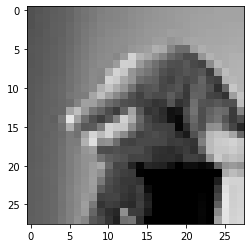

In [4]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

print("Dimensions of training set feature matrix:", train_features.shape)
print("Dimensions of training set label matrix:", train_labels.shape)

EXAMPLE_INDEX = np.random.randint(27455)
pretty_print(train_features.iloc[EXAMPLE_INDEX].values)

plt.figure()
plt.imshow(train_features.iloc[EXAMPLE_INDEX].values.reshape(28,28),cmap='gray', vmin=0, vmax=255)
plt.show()

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [6]:
# rfc_pipe = Pipeline([
#         ('scaler', MinMaxScaler()),
#         ('RFC', RandomForestClassifier(n_jobs = -1))
#         ])

# # other params are set to reasonable measures

# rfc_param_grid = {'RFC__n_estimators': [100,500,1000,1500,2000]}

# rfc = GridSearchCV(rfc_pipe, rfc_param_grid, scoring='f1_weighted', cv=5, n_jobs = -1, error_score='raise')
# rfc.fit(train_features,train_labels)
# print(rfc.best_params_)
# print(rfc.best_score_)

# # generate a curve that gives performance on y axis

In [7]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# scores =[]
# for k in range(1, 200):
#     rfc = RandomForestClassifier(n_estimators=k)
#     rfc.fit(x_train, y_train)
#     y_pred = rfc.predict(x_test)
#     scores.append(accuracy_score(y_test, y_pred))

# import matplotlib.pyplot as plt
# %matplotlib inline

# # plot the relationship between K and testing accuracy
# # plt.plot(x_axis, y_axis)
# plt.plot(range(1, 200), scores)
# plt.xlabel('Value of n_estimators for Random Forest Classifier')
# plt.ylabel('Testing Accuracy')

In [ ]:
# train_scores = []

# rfc_pipe = Pipeline([
#         ('scaler', MinMaxScaler()),
#         ('RFC', RandomForestClassifier(n_jobs = -1))
#         ])
# for k in range(1, 101):
#     estimator_param = {'RFC__n_estimators': [k]}
#     rfc = GridSearchCV(rfc_pipe, estimator_param, scoring='f1_weighted', cv=5, n_jobs = -1, error_score='raise')
#     rfc.fit(train_features, train_labels)
#     train_scores.append(rfc.best_score_)

In [ ]:
# for k in range(101, 151):
#     estimator_param = {'RFC__n_estimators': [k]}
#     rfc = GridSearchCV(rfc_pipe, estimator_param, scoring='f1_weighted', cv=5, n_jobs = -1, error_score='raise')
#     rfc.fit(train_features, train_labels)
#     train_scores.append(rfc.best_score_)

In [ ]:
train_scores = []
estimators = [10, 20, 50, 100, 200, 500, 1000]

rfc_pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('RFC', RandomForestClassifier(n_jobs = -1))
        ])
for n in estimators:
    estimator_param = {'RFC__n_estimators': [n]}
    rfc = GridSearchCV(rfc_pipe, estimator_param, scoring='f1_weighted', cv=5, n_jobs = -1, error_score='raise')
    rfc.fit(train_features, train_labels)
    print(rfc.best_score_)
    train_scores.append(rfc.best_score_)

In [ ]:
train_scores_test = []
estimators = [10, 20, 50]

rfc_pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('RFC', RandomForestClassifier(n_jobs = -1))
        ])
for n in estimators:
    estimator_param = {'RFC__n_estimators': [n]}
    rfc = GridSearchCV(rfc_pipe, estimator_param, scoring='f1_weighted', cv=5, n_jobs = -1, error_score='raise')
    rfc.fit(train_features, train_labels)
    print(rfc.best_score_)
    train_scores_test.append(rfc.best_score_)

In [ ]:
train_scores_test = []
estimators = [10, 20, 50]

rfc = RandomForestClassifier()
for n in estimators:
    estimator_param = {'n_estimators': [n]}
    rfc = GridSearchCV(rfc, estimator_param, scoring='f1_weighted', cv=5, n_jobs = -1, error_score='raise')
    rfc.fit(train_features, train_labels)
    print(rfc.best_score_)
    train_scores_test.append(rfc.best_score_)

In [ ]:
# estimators = [10]

# rfc_pipe = Pipeline([
#         ('scaler', MinMaxScaler()),
#         ('RFC', RandomForestClassifier(n_jobs = -1))
#         ])
# for n in estimators:
#     estimator_param = {'RFC__n_estimators': [n], 'RFC__max_depth': [8]}
#     rfc = GridSearchCV(rfc_pipe, estimator_param, scoring='f1_weighted', cv=5, n_jobs = -1, error_score='raise')
#     rfc.fit(train_features, train_labels)
#     print(rfc.best_score_)
#     print(rfc.best_params_)
#     # train_scores.append(rfc.best_score_)

In [ ]:
# just in case so we don't have to re-run it :)
# using n = [10, 20, 50, 100, 200, 500, 1000]
n_estimators = [10, 20, 50, 100, 200, 500, 1000]

train_scores_saved = [0.98200201140238, 0.9923864366606192, 0.9964309756034606, 0.9974491045615146, 0.9975579700388598, 0.998105124221986, 0.9981050814900575]
print(train_scores_saved)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between n_estimators and training score
# plt.plot(x_axis, y_axis)
plt.plot(n_estimators, train_scores_saved)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Training Score')

In [ ]:
# https://towardsdatascience.com/random-forest-classification-678e551462f5

In [ ]:
print(train_scores[99])

# 0.9975955707035095

In [ ]:
print(train_scores[99])

In [ ]:
print(train_scores[149])

# 0.9978139032478406

In [ ]:
print(train_scores[150])

In [ ]:
print(train_scores)

In [ ]:
# for i in range(150):
#     print("n estimators: ", i, " score: ", train_scores[i])

In [8]:
best_rfc = RandomForestClassifier(n_estimators=500)
best_rfc.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=500)

In [9]:
from sklearn.metrics import f1_score

print(f1_score(train_labels, best_rfc.predict(train_features), average='weighted'))

print(f1_score(test_labels, best_rfc.predict(test_features),average = 'weighted'))

1.0
0.8318514082143124


In [ ]:
# n = 100
# 0.8155375718710718

# n = 150
# 0.8222695344177406

# n = 200
# 0.8269323313596375
